In [1]:
import pymongo
import pandas as pd
import joblib
from bson import ObjectId
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from constants import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
print(class_label)

['Unhealthy', 'Healthy']


In [3]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["nutrition_label_data"]
collection = db["hk_fit_calorie_food_items"]

## Read the data


In [4]:
# Read data from MongoDB
data = list(collection.find())

# Convert to DataFrame
df = pd.DataFrame(data)

In [5]:
df.mealType.value_counts()

mealType
Breakfast                          1969
Lunch                               883
Snacks                              837
Lunch, Dinner                       689
Mid-Morning                         687
                                   ... 
Post workout                          1
test                                  1
Lunch,Dinner, Others                  1
Breakfast, Lunch, Dinner, Snack       1
Breakfast/Lunch/Dinner                1
Name: count, Length: 194, dtype: int64

  <p>sugar("Sugar", "g"),</p>
  <p>sodium("Sodium", "mg"),</p>
  <p>calcium("Calcium", "mg"),</p>
  <p>potassium("Potassium", "mg"),</p>
  <p>iron("Iron", "mg"),</p>
  <p>magnesium("Magnesium", "mg"),</p>
  <p>chloride("Chloride", "mg"),</p>
  <p>zinc("Zinc", "mg"),</p>
  <p>saturatedFat("Saturated Fat", "g"),</p>
  <p>polyUnsaturatedFat("Polyunsaturated Fat", "g"),</p>
  <p>transFat("Trans Fat", "g"),</p>
  <p>monoUnsaturatedFat("Monounsaturated Fat", "g")</p>
  <p>omega("Omega 3", "mg"),</p>
  <p>Omega3("Omega 3", "mg"),</p>
  <p>Cholesterol("Cholesterol", "mg"),</p>
  <p>chromium("Chromium", "mcg"),</p>
  <p>selenium("Selenium", "mcg"),</p>
  <p>copper("Copper", "mg"),</p>
  <p>iodine("Iodine", "mcg"),</p>
  <p>manganese("Manganese", "mg"),</p>
  <p>molybdenum("Molybdenum", "mcg"),</p>
  <p>phosphorus("Phosphorus", "mg"),</p>
  <p>vitaminC("Vitamin C", "mg"),</p>
  <p>vitaminE("Vitamin E", "mg"),</p>
  <p>vitaminD("Vitamin D", "mcg"),</p>
  <p>vitaminK("Vitamin K", "mcg"),</p>
  <p>vitaminD2("Vitamin D2", "mcg"),</p>
  <p>vitaminD3("Vitamin D3", "mcg"),</p>
  <p>vitaminB1("Vitamin B1", "mg"),</p>
  <p>vitaminB2("Vitamin B2", "mg"),</p>
  <p>vitaminB3("Vitamin B3", "mg"),</p>
  <p>vitaminB5("Vitamin B5", "mg"),</p>
  <p>vitaminB6("Vitamin B6", "mg"),</p>
  <p>vitaminB7("Vitamin B7", "mcg")</p>
  <p>vitaminB9("Vitamin B9", "mcg")</p>
  <p>vitaminA("Vitamin A", "mcg"),</p>
  <p>vitaminB12("Vitamin B12", "mcg");</p>


## Data Preprocessing

In [6]:
df

,_id,Cholesterol,addedSugar,calories,carbs,createDt,createdAt,fat,fibre,foodChoice,...,allergen,cuisine,foodFamily,foodUsp,healthType,originalImage,recipe,subCategory,foodType,magnesium
0,ObjectId(5dea3e3528fdfeabbd8b1c66),0.00,0,875,22.3,2020-08-06 11:26:05,2020-08-06 05:56:05.899000,76.6,13.7,Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ObjectId(5dea3e3528fdfeabbd8b1c73),0.00,0,602,16.5,2020-08-06 11:26:06,2020-08-06 05:56:06.223000,51.2,0,Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ObjectId(5dea3e3528fdfeabbd8b1c91),0.00,0,363.7,27.9,2020-08-06 11:26:05,2020-08-06 05:56:05.904000,14,11.1,Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ObjectId(5dea3e3528fdfeabbd8b1c9c),0.00,0,20.1,7.1,2020-08-06 11:26:06,2020-08-06 05:56:06.321000,0.1,1.9,Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ObjectId(5dea3e3528fdfeabbd8b1ca6),0.00,0,684,13.9,2020-08-06 11:26:06,2020-08-06 05:56:06.216000,71.3,9.5,Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8903,6007eae528dbd50c69435ca1,0.00,0,0.0,0.0,2021-01-20 14:03:41,2021-01-20 08:33:41.927000,0.0,0.0,Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8904,6007eae528dbd50c69435ca4,43.10,0,251.34,26.2,2021-01-20 14:03:41,2021-01-20 08:33:41.936000,8.05,5.29,Non Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8905,6007eae528dbd50c69435ca7,0.00,0,0.0,0.0,2021-01-20 14:03:41,2021-01-20 08:33:41.944000,0.0,0.0,Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8906,6007eae528dbd50c69435caa,0.75,0,122.17,16.24,2021-01-20 14:03:41,2021-01-20 08:33:41.951000,3.09,8.61,Veg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   _id                   8908 non-null   object        
 1   Cholesterol           5307 non-null   float64       
 2   addedSugar            4672 non-null   object        
 3   calories              8852 non-null   object        
 4   carbs                 8840 non-null   object        
 5   createDt              3104 non-null   object        
 6   createdAt             3104 non-null   object        
 7   fat                   8811 non-null   object        
 8   fibre                 8311 non-null   object        
 9   foodChoice            4920 non-null   object        
 10  foodId                8327 non-null   float64       
 11  foodName              8908 non-null   object        
 12  mealType              8908 non-null   object        
 13  minerals          

Index(['_id', 'Cholesterol', 'addedSugar', 'calories', 'carbs', 'createDt',
       'createdAt', 'fat', 'fibre', 'foodChoice', 'foodId', 'foodName',
       'mealType', 'minerals', 'monoUnsaturatedFat', 'omega',
       'polyUnsaturatedFat', 'protein', 'servingSize', 'servingUnit',
       'servingUnitType', 'status', 'transFat', 'updateDt', 'updatedAt',
       'vitamins', 'weight', 'applicable_for_diet', 'include_in_diet_chat',
       'sugar', 'alternateName', 'volume', 'size', 'maxQuantity',
       'minQuantity', 'mealQuality', 'createAt', 'image', 'updateAt',
       'mealUSP', 'servingUnitSize', 'allergen', 'cuisine', 'foodFamily',
       'foodUsp', 'healthType', 'originalImage', 'recipe', 'subCategory',
       'foodType', 'magnesium'],
      dtype='object')

In [8]:
# Extract vitamins data and normalize it into separate columns
df.drop(["magnesium"],inplace=True,axis=1)
vitamins_df = pd.json_normalize(df['vitamins'])
minerals_df = pd.json_normalize(df["minerals"])


# Merge the normalized vitamins data back into the original DataFrame
df = df.drop(columns=['vitamins']).join(vitamins_df)
df = df.drop(columns=['minerals']).join(minerals_df)


In [9]:
df.dropna(subset=["healthType"],inplace=True)
df['isHealthy'] = df['healthType'].replace({
    'Healthy':1,
    'Unhealthy':0
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2479 entries, 320 to 8726
Data columns (total 79 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   _id                   2479 non-null   object        
 1   Cholesterol           2401 non-null   float64       
 2   addedSugar            2427 non-null   object        
 3   calories              2479 non-null   object        
 4   carbs                 2478 non-null   object        
 5   createDt              908 non-null    object        
 6   createdAt             908 non-null    object        
 7   fat                   2459 non-null   object        
 8   fibre                 2301 non-null   object        
 9   foodChoice            2479 non-null   object        
 10  foodId                2479 non-null   float64       
 11  foodName              2479 non-null   object        
 12  mealType              2479 non-null   object        
 13  monoUnsaturatedFat   

C:\Users\adars\AppData\Local\Temp\ipykernel_2384\463486577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['isHealthy'] = df['healthType'].replace({


In [10]:
# remove columns 
columns_to_remove= ["_id","createDt","createdAt","foodChoice",
                    "foodId","foodName","mealType","updateDt","updatedAt",
                    "maxQuantity","minQuantity","createAt","image","updateAt","magnesium",
                    "foodType","healthType","alternateName","status","applicable_for_diet","include_in_diet_chat",
                    "mealQuality","originalImage","recipe","subCategory","foodFamily","cuisine",
                    "allergen","servingUnitSize","mealUSP","size","omega","servingSize","servingUnit",
                    "servingUnitType","foodUsp","volume",
                    "molybdenum","copper","selenium","manganese","chromium","magnesium","chloride","iodine",
                    "vitaminD2","vitaminD3","zinc","phosphorus","calories","addedSugar",
                    "vitaminB1","vitaminB2","vitaminB3","vitaminB5","vitaminB7","vitaminB9"]

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [11]:
# Convert object columns to float64
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')


In [12]:
# Fill all NaN values in the entire DataFrame with 0
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2479 entries, 320 to 8726
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cholesterol         2479 non-null   float64
 1   carbs               2479 non-null   float64
 2   fat                 2479 non-null   float64
 3   fibre               2479 non-null   float64
 4   monoUnsaturatedFat  2479 non-null   float64
 5   polyUnsaturatedFat  2479 non-null   float64
 6   protein             2479 non-null   float64
 7   transFat            2479 non-null   float64
 8   weight              2479 non-null   float64
 9   sugar               2479 non-null   float64
 10  vitaminC            2479 non-null   float64
 11  vitaminE            2479 non-null   float64
 12  vitaminD            2479 non-null   float64
 13  vitaminK            2479 non-null   float64
 14  vitaminB6           2479 non-null   float64
 15  vitaminA            2479 non-null   float64
 16  vitaminB1

In [13]:
df.isHealthy.value_counts()

isHealthy
1    1338
0    1141
Name: count, dtype: int64

In [14]:
# Rename the columns 
# df.rename (columns={
#     "carbs":"Total Carbohydrate",
#     "fat":"Total Fat",
#     "saturatedFat":"Saturated Fat",
#     "polyUnsaturatedFat":"Poly Unsaturated Fat",
#     "monoUnsaturatedFat":"Mono Unsaturated Fat",
#     "transFat":"Trans Fat",
#     "sodium":"Sodium",
#     "sugar":"Total Sugars",
#     "protein":"Protein",
#     "fibre":"Dietary Fiber",
#     "potassium":"Potassium",
#     "vitaminA":"Vitamin A",
#     "vitaminB6":"Vitamin B6",
#     "vitaminB12":"Vitamin B12",
#     "vitaminC":"Vitamin C",
#     "vitaminD":"Vitamin D",
#     "vitaminE":"Vitamin E",
#     "vitaminK":"Vitamin K",
#     "calcium":"Calcium",
#     "iron":"Iron"
# },inplace=True)
df

,Cholesterol,carbs,fat,fibre,monoUnsaturatedFat,polyUnsaturatedFat,protein,transFat,weight,sugar,...,vitaminK,vitaminB6,vitaminA,vitaminB12,potassium,calcium,saturatedFat,sodium,iron,isHealthy
320,3.0,5.865,4.035,1.35,1.522,1.293,1.59,0.00,150.0,1.62,...,39.45,0.048,22.50,0.015,157.50,33.00,1.218,505.50,0.225,1
321,0.0,3.380,0.960,1.44,0.330,0.400,1.03,0.01,150.0,0.45,...,70.23,0.070,92.80,0.000,184.74,30.96,0.200,1645.17,0.840,1
322,0.0,12.060,1.520,3.59,0.460,0.660,4.32,0.02,150.0,1.44,...,9.40,0.080,81.67,0.000,324.76,27.51,0.290,205.48,1.330,1
324,4.6,7.780,2.670,3.17,0.034,0.207,1.98,0.00,150.0,1.49,...,12.85,0.100,54.24,0.000,216.50,16.86,0.070,345.10,0.320,1
325,0.0,4.270,3.490,0.86,0.920,2.090,1.07,0.00,30.0,0.49,...,4.72,0.020,26.55,0.000,43.06,5.40,0.410,41.55,0.410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8721,0.0,17.740,0.590,0.00,0.170,0.020,0.33,0.00,40.0,0.48,...,0.01,0.000,0.13,0.010,10.19,10.95,0.420,2.71,0.010,1
8722,0.0,25.770,4.120,1.94,1.490,1.620,2.76,0.00,60.0,0.48,...,0.88,0.000,0.06,0.000,76.00,50.06,0.790,354.34,0.670,1
8723,0.0,23.020,4.250,2.94,1.430,1.730,5.17,0.00,124.0,1.15,...,145.52,0.180,194.35,0.000,359.95,58.24,0.850,96.29,1.190,1
8724,0.0,3.710,4.060,1.88,1.250,1.510,1.85,0.00,100.0,0.52,...,172.65,0.130,273.98,0.000,397.51,50.66,0.720,25.52,2.470,1


In [15]:
X = df.drop(['isHealthy'], axis = 1)
y = df['isHealthy']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2479 entries, 320 to 8726
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cholesterol         2479 non-null   float64
 1   carbs               2479 non-null   float64
 2   fat                 2479 non-null   float64
 3   fibre               2479 non-null   float64
 4   monoUnsaturatedFat  2479 non-null   float64
 5   polyUnsaturatedFat  2479 non-null   float64
 6   protein             2479 non-null   float64
 7   transFat            2479 non-null   float64
 8   weight              2479 non-null   float64
 9   sugar               2479 non-null   float64
 10  vitaminC            2479 non-null   float64
 11  vitaminE            2479 non-null   float64
 12  vitaminD            2479 non-null   float64
 13  vitaminK            2479 non-null   float64
 14  vitaminB6           2479 non-null   float64
 15  vitaminA            2479 non-null   float64
 16  vitaminB1

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1983, 22)
(496, 22)


In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:

y_pred = model.predict(X_test)
confusion_matrix(y_pred=y_pred, y_true=y_test)
confusion_matrix(y_pred=y_pred, y_true=y_train)

array([[215,  19],
       [ 16, 246]])

In [19]:
joblib_file = "model.pkl"
joblib.dump(model, joblib_file)

['model.pkl']

In [20]:
model

RandomForestClassifier()

In [21]:

prediction = model.predict(X_test.iloc[[0]])[0]
print(prediction)
print(class_label[prediction])


1
Healthy


In [22]:
print(class_label)

['Unhealthy', 'Healthy']


In [24]:
X_test.iloc[0]

Cholesterol            12.700
carbs                   3.170
fat                     1.280
fibre                   1.100
monoUnsaturatedFat      0.030
polyUnsaturatedFat      0.097
protein                 0.420
transFat                0.000
weight                150.000
sugar                   1.710
vitaminC                2.920
vitaminE                0.000
vitaminD                4.110
vitaminK                7.260
vitaminB6               0.050
vitaminA               25.850
vitaminB12              0.000
potassium              89.130
calcium                 6.630
saturatedFat            0.042
sodium                315.790
iron                    0.180
Name: 1770, dtype: float64

In [28]:
y_test.iloc[0]

np.int64(1)

In [1]:
import pickle
# Step 1: Load the model from the pickle file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)
print(type(model))

<class 'numpy.ndarray'>


In [21]:
df.columns[:-1]


Index(['Cholesterol', 'carbs', 'fat', 'fibre', 'monoUnsaturatedFat',
       'polyUnsaturatedFat', 'protein', 'transFat', 'weight', 'sugar',
       'vitaminC', 'vitaminE', 'vitaminD', 'vitaminK', 'vitaminB6', 'vitaminA',
       'vitaminB12', 'potassium', 'calcium', 'saturatedFat', 'sodium', 'iron'],
      dtype='object')

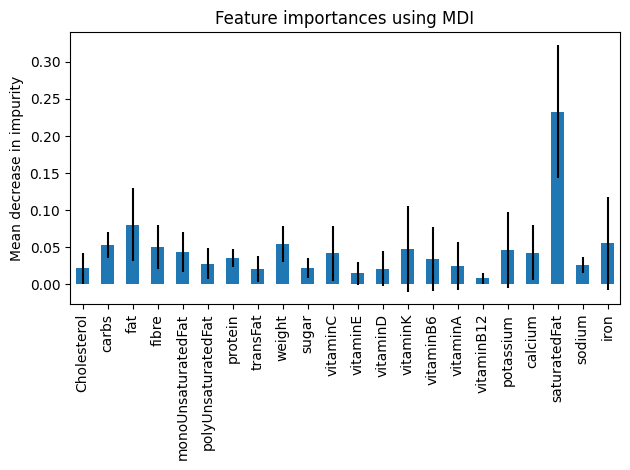

In [25]:
import time
import numpy as np
import pandas as pd
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=df.columns[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

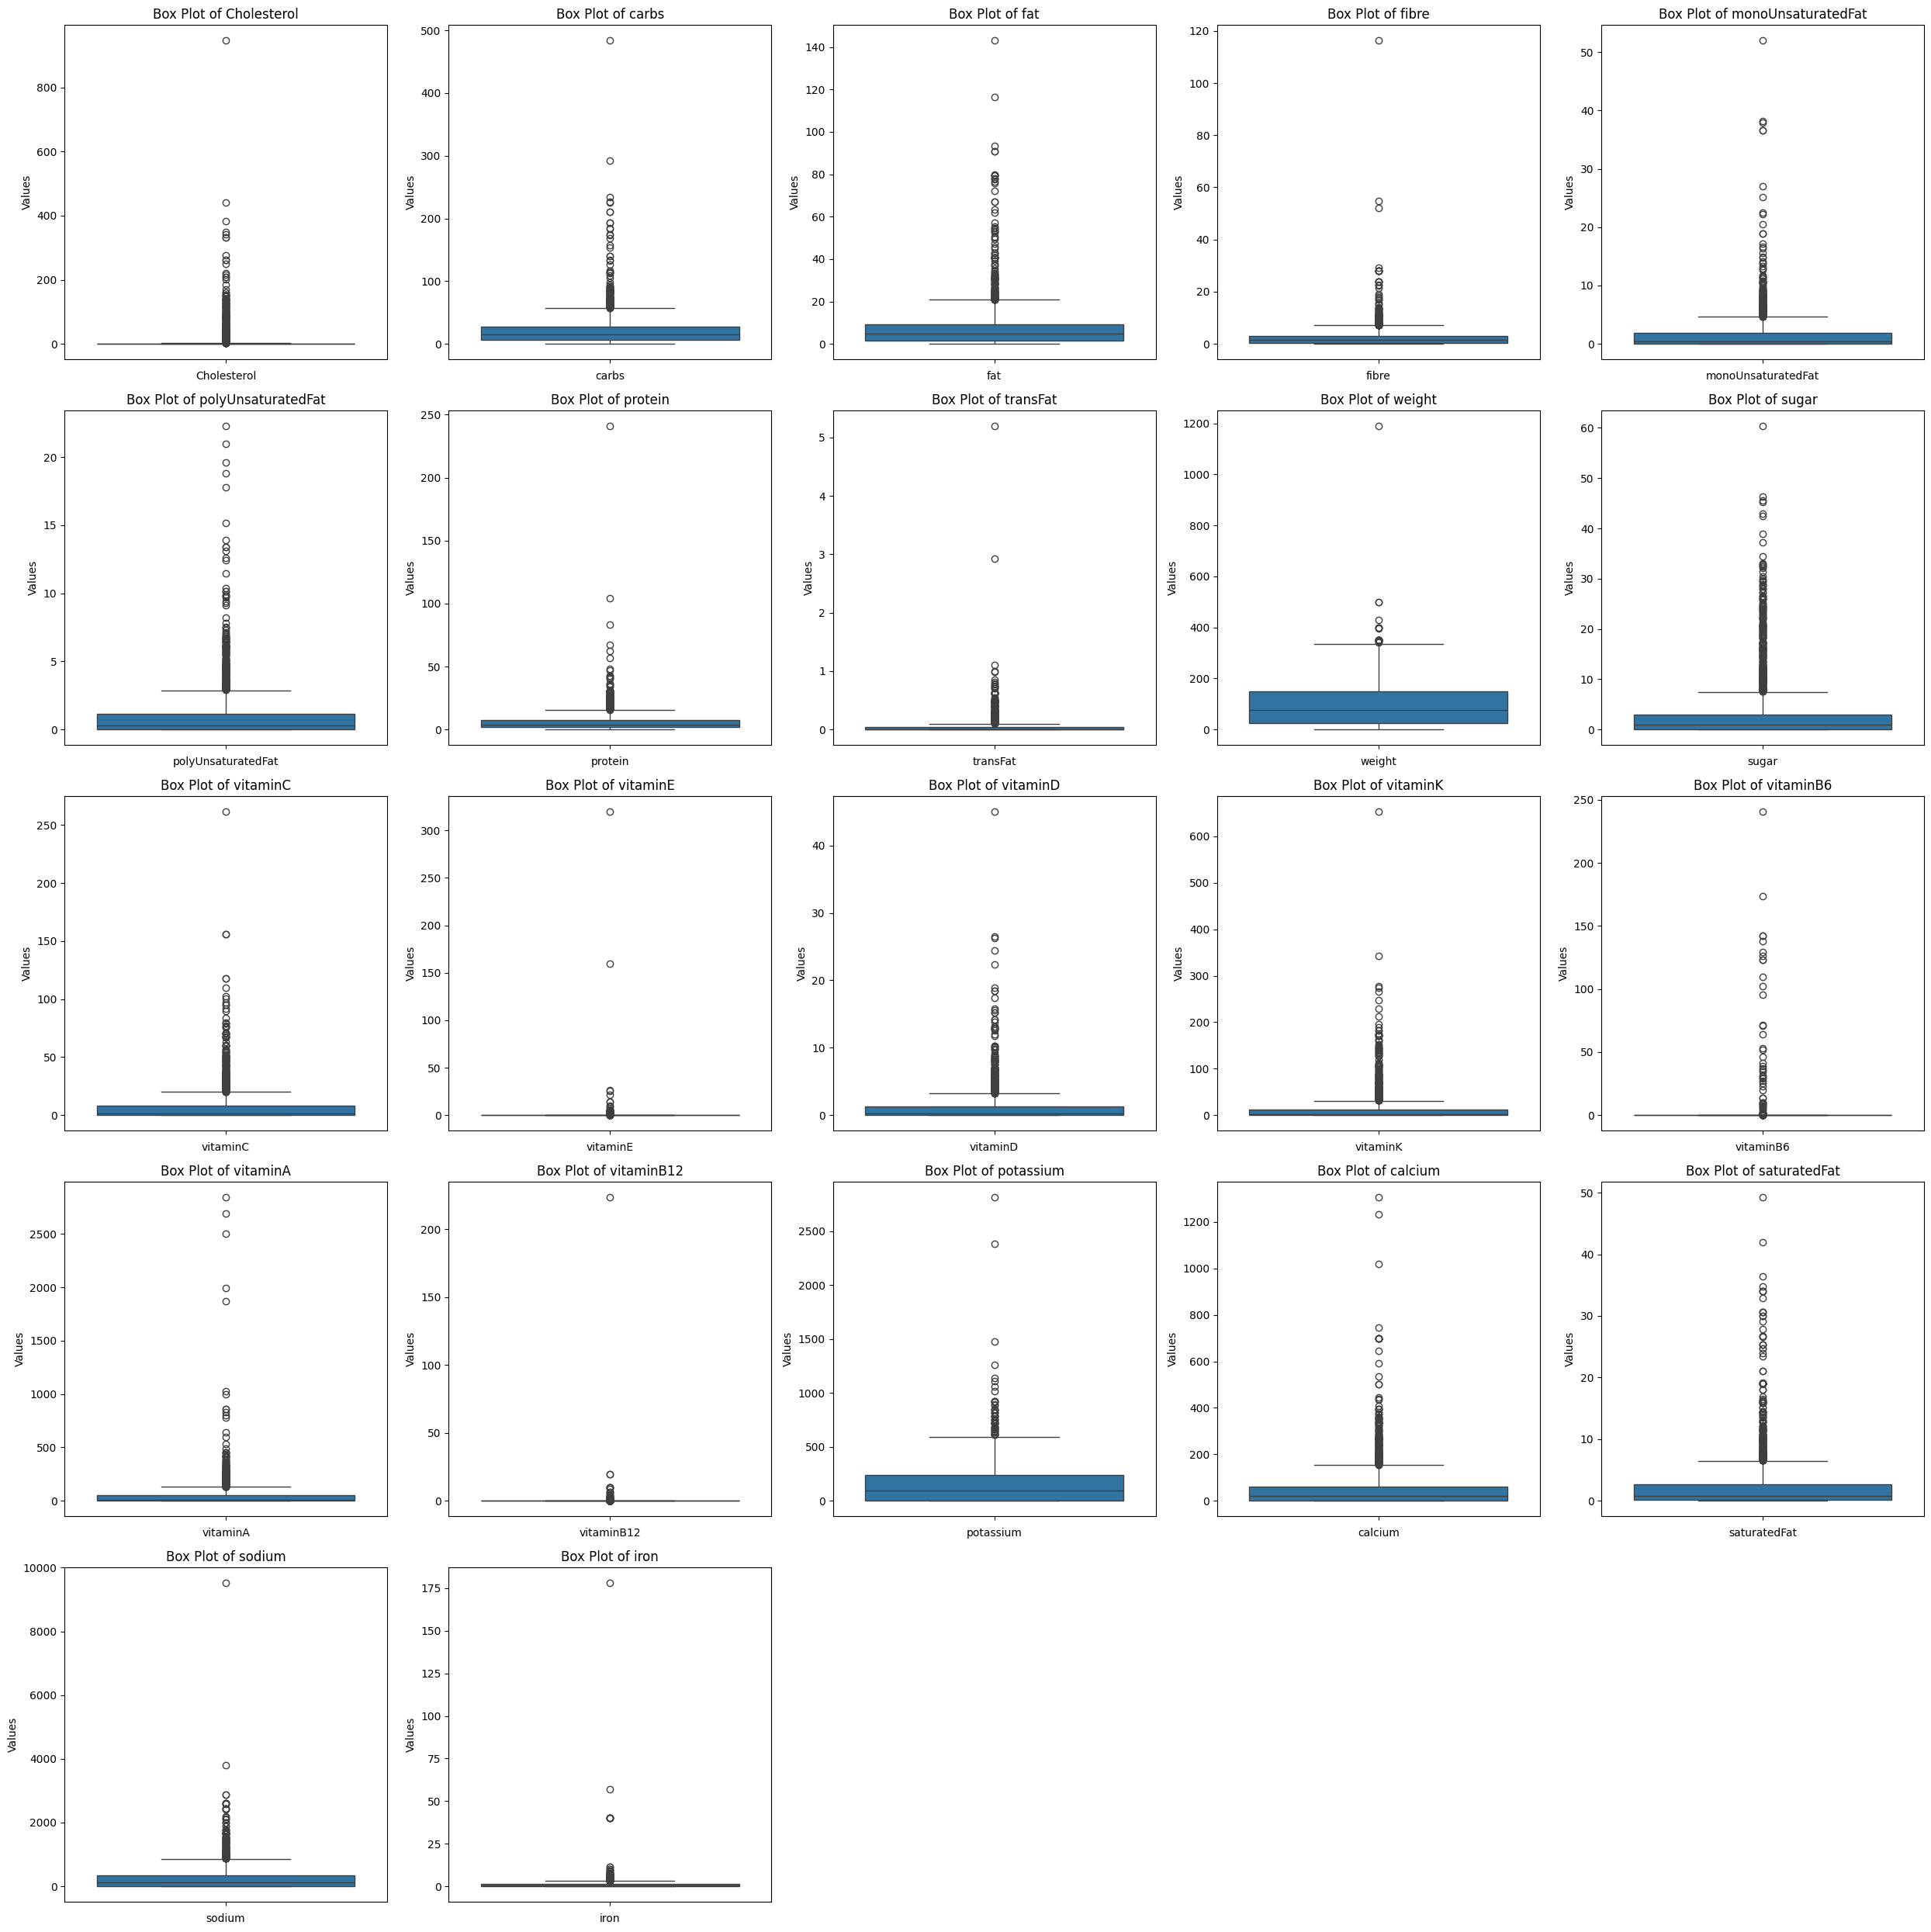

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = df.columns[:-1]
# Number of plots per row
plots_per_row = 5

# Calculate the number of rows needed
n_rows = (len(columns_to_plot) + plots_per_row - 1) // plots_per_row
# Set up the matplotlib figure
fig, axs = plt.subplots(n_rows, plots_per_row, figsize=(plots_per_row * 5, n_rows * 5))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot each column as a box plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=df, y=column, ax=axs[i])
    axs[i].set_title(f'Box Plot of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Values')

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()